In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper', font_scale=1.5)
red, blue, green, purple = sns.color_palette('Set1', 4)
fontdict = dict(size=14)

# Result 2

In [57]:
b = 1.3
v = 1
TA = 0.4
ΔT = np.linspace(TA-1+1e-10, TA-1e-10, 1000)
TB = TA - ΔT
assert ((0<=TB) & (TB<=1)).all()

α = 0
#α = 0.7
# α = 1/8

In [58]:
γ1 = (b*v*α*TA + (TA - TB)) / (v * (1 - TB))
γ2 = (b*v*α*TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

c = np.linspace(0, 1, 1001).reshape((-1, 1))
pstar = (c * (1 - TB) - b * α * TA - (TA - TB)) / (b * (1 - α) * (TA - TB))

pstar = np.ma.masked_greater(pstar, 1)
pstar = np.ma.masked_less(pstar, 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

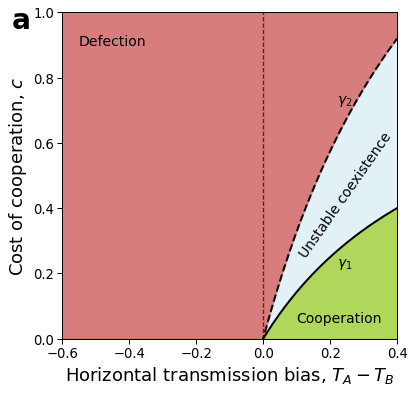

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# ax = axes[0]
ax.plot(ΔT, γ1, '-k', lw=2)
ax.plot(ΔT, γ2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos],  0,        γ1[pos],  color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], 0,        γ2[~pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], γ1[~pos], 1,        color='indianred',   alpha=0.8)
ax.fill_between(ΔT[pos],  γ2[pos],  1,        color='indianred',  alpha=0.8)
ax.fill_between(ΔT[~pos], γ2[~pos], γ1[~pos], color='gold',      alpha=0.5)
ax.fill_between(ΔT[pos], γ1[pos],   γ2[pos],  color='lightblue', alpha=0.35)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xticks=np.linspace(ΔT.min(), ΔT.max(), 6),
)
ax.set_xlabel('Horizontal transmission bias, $T_A - T_B$', fontsize=18)
ax.set_ylabel('Cost of cooperation, $c$', fontsize=18)
ax.text(-0.55, 0.9, 'Defection', fontdict=fontdict, rotation=0)
ax.text(0.1, 0.05, r'Cooperation', fontdict=fontdict, rotation=0)
if α == 0.7:
    ax.text(-0.33, 0.03, 'Stable coexistence', fontdict=dict(fontsize=12), rotation=70)
    ax.text(0.1, 0.69, r'Unstable coexist.', fontdict=dict(fontsize=12), rotation=25)    
if α == 0:
    ax.text(0.1, 0.25, r'Unstable coexistence', fontdict=fontdict, rotation=55)

# ax = axes[1]
# im = ax.pcolormesh(ΔT, c, pstar, cmap='RdYlGn', alpha=0.5, rasterized=True, vmin=0, vmax=1)
# # plt.colorbar(im, label='Frequency of $A$ at equilibrium, $p^*$', ax=ax)
# ax.plot(ΔT, γ1, '-k', lw=2)
# ax.plot(ΔT, γ2, '--k', lw=2)
# ax.axvline(0, color='k', ls='--', alpha=0.7)
# ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
#        xlabel='Horizontal transmission bias, $T_A - T_B$',
# )

# for ax in axes:
if α == 0:
    ax.text(0.22, 0.22, r'$\gamma_1$', fontdict=fontdict)
    ax.text(0.22, 0.72, r'$\gamma_2$', fontdict=fontdict)
if α == 0.7:
    ax.text(0.22, 0.675, r'$\gamma_1$', fontdict=fontdict)
    ax.text(0.22, 0.875, r'$\gamma_2$', fontdict=fontdict)

# fig.tight_layout()
if α == 0:
    ax.text(-0.75, 0.95, 'a', fontdict=dict(fontsize=28, weight='bold'))
    fig.savefig('Figures/Result2_c_zero_alpha.pdf')
    fig.savefig('Figures/Result2_c_zero_alpha.eps')
if α == 0.7:
    ax.text(-0.75, 0.95, 'b', fontdict=dict(fontsize=28, weight='bold'))
    fig.savefig('Figures/Result2_c_non_zero_alpha.pdf')
    fig.savefig('Figures/Result2_c_non_zero_alpha.eps')

## Corollary 5

In [60]:
c = 0.35

α = np.linspace(1e-10, 1-1e-10, 1001).reshape((-1, 1))
pstar = (c * (1 - TB) - b * α * TA - (TA - TB)) / (b * (1 - α) * (TA - TB))

pstar = np.ma.masked_greater(pstar, 1)
pstar = np.ma.masked_less(pstar, 0)

In [61]:
a1 = (c * (1 - TB) - (1 + b) * (TA - TB)) / (b * TB)
a2 = (c * (1 - TB) - (TA - TB))/(b * TA)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

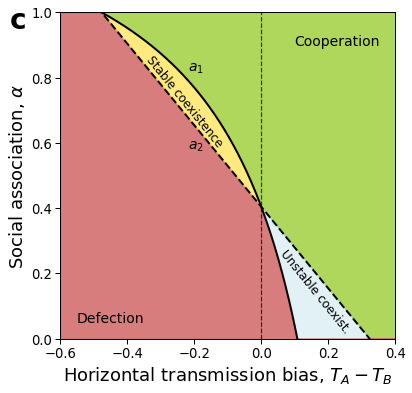

In [62]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(ΔT[a1<0] , a1[a1<0], '-k', lw=2)
ax.plot(ΔT[a1>0] , a1[a1>0], '-k', lw=2)
ax.plot(ΔT,  a2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos],  1,       a2[pos],  color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], 1,       a1[~pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[pos],  a1[pos],           color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], a2[~pos],          color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], a2[~pos],a1[~pos], color='gold', alpha=0.5)
ax.fill_between(ΔT[pos],  a1[pos], a2[pos],  color='lightblue', alpha=0.35)

ax.text(-0.55, 0.05, 'Defection', fontdict=fontdict, rotation=0)
ax.text(0.1, 0.9, r'Cooperation', fontdict=fontdict, rotation=0)
ax.text(-0.35, 0.59, 'Stable coexistence', fontdict=dict(fontsize=12), rotation=-51)
ax.text(0.05, 0.018, r'Unstable coexist.', fontdict=dict(fontsize=12), rotation=-51)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1),
       xticks=np.linspace(ΔT.min(), ΔT.max(), 6),
)
ax.set_xlabel('Horizontal transmission bias, $T_A - T_B$', fontsize=18)
ax.set_ylabel(r'Social association, $\alpha$', fontsize=18)

ax.text(-0.22, 0.82, r'$a_1$', fontdict=fontdict)
ax.text(-0.22, 0.58, r'$a_2$', fontdict=fontdict)
ax.text(-0.75, 0.95, 'c', fontdict=dict(fontsize=28, weight='bold'))

fig.savefig('Figures/Result2_alpha.pdf')
fig.savefig('Figures/Result2_alpha.eps')

# Recurrence - result 2

0.4924242424242424
0.4923076923076921


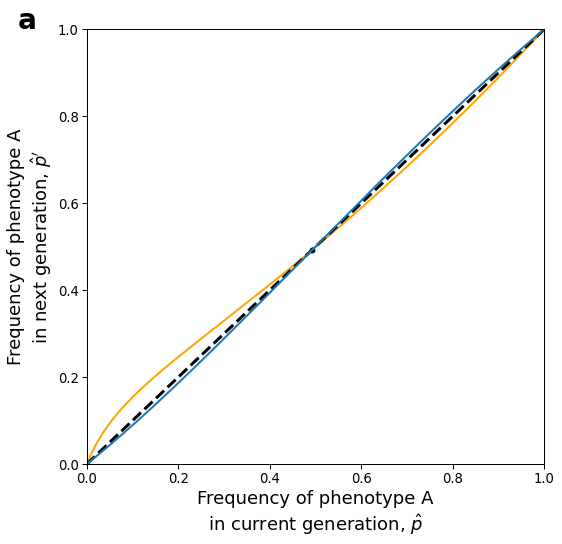

In [83]:
b=12
c = 0.35
T_A = 0.4
T_B = 0.9
α = 0.45

def p_parents_function(p):
    x1 = (p ** 2)*(1+b-c)*(1-(1-p)*(1-α)*T_B)
    x2 = p*(1-p)*(1-c)*(p*(1-α)*T_B+1-T_B)
    x3 = p*(1-p)*(1+b)*(p*(1-α)+α)*T_A
    x4 = ((1-p)**2)*p*(1-α)*T_A
    omega = 1+p*(b-c)
    p_parents = (x1+x2+x3+x4)/omega
    return p_parents

p_equilibrium = (c*(1-T_B)-α*b*T_A-(T_A-T_B))/(b*(1-α)*(T_A-T_B))
print(p_equilibrium)

p = np.arange(0, 1, 0.001)
p_tag = p_parents_function(p)

fig, ax = plt.subplots(figsize=(8.2, 8))
ax.plot(p, p_tag, color="orange", linewidth=2)
ax.plot(p, p, 'k--', linewidth=3)
#plt.plot(β3/β1, β3/β1, "ko", label = r'$\tilde{p}^*$')
ax.set_xlabel(r'Frequency of phenotype A' + "\n" + r"in current generation, $\hat{p}$", fontsize = 18)
ax.set_ylabel(r"Frequency of phenotype A" + "\n" + r"in next generation, $\hat{p}'$", fontsize = 18)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)


b=1.3
c = 0.904
T_A = 0.5
T_B = 0.1
α = 0.4
p_equilibrium = (c*(1-T_B)-α*b*T_A-(T_A-T_B))/(b*(1-α)*(T_A-T_B))
print(p_equilibrium)
plt.plot(p_equilibrium, p_equilibrium, "ko", label = r'$\tilde{p}^*$')
ax.text(-0.15, 1, 'a', fontdict=dict(fontsize=28, weight='bold'))



p_tag = p_parents_function(p)
ax.plot(p, p_tag, linewidth = 2)
fig.savefig('Figures/coexistence_without_oblique.pdf')

# Result 3
## T_B > T_A

In [63]:
TA = 0.5
TB = 0.7
b = 2
α = 0.7

In [64]:
vhat = (TB - TA) / (1 - TA)

In [65]:
v = np.linspace(1e-10, 1-1e-10, 1000)

In [66]:
γ1 = (b * v * α * TA + (TA - TB)) / (v * (1 - TB))
γ1[np.isinf(γ1)] = -100
γ2 = (b * v * α * TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

In [67]:
c = np.linspace(0, 1, 1001).reshape((-1, 1))
β1 = (c * (1-v) - b * (1-α*v)) * (TA - TB)
β3 = α * b * v * TA - c * v * (1-TB) +(TA-TB)

pstar = β3 / β1
pstar = np.ma.masked_greater(pstar, 1)
pstar = np.ma.masked_less(pstar, 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

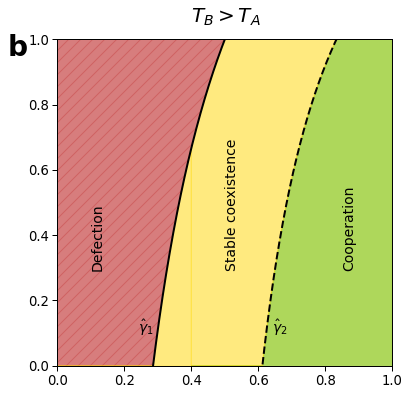

In [68]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ix = v>vhat
ax.plot(v[ix], γ2[ix], '--k', lw=2)

# iii.b v<vhat, γ2<c : irrelevant for these parameters.
ix = v<=vhat
ax.fill_between(v[ix], γ2[ix], 1,      color='yellowgreen', alpha=0.8)
# # iii.a, v>vhat, c<γ2
ix = v>vhat
ax.fill_between(v[ix], 0,      γ2[ix], color='yellowgreen', alpha=0.8)
# vi, γ1<c 
ax.fill_between(v,     1 ,     γ1,     color='indianred', hatch="//", alpha=0.8) 

# vii.a, v<vhat, c<γ2 and c<γ1
ix = v<=vhat
ax.fill_between(v[ix], np.minimum(γ1[ix], γ2[ix]), color='gold', alpha=0.5)
# # vii.b, v>vhat, γ2<c<γ1
ix = v>vhat
ax.fill_between(v[ix], γ2[ix],  γ1[ix], color='gold', alpha=0.5)

ax.set(
    #ylabel='Cost of cooperation, $c$',
    #xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)

ax.text(0.85, 0.3, r'Cooperation', fontdict=fontdict, rotation=90)
ax.text(0.1, 0.3, r'Defection', fontdict=fontdict, rotation=90)
ax.text(0.5, 0.3, r'Stable coexistence', fontdict=fontdict, rotation=90)
ax.text(0.24, 0.1, r'$\hat\gamma_1$', fontdict=fontdict)
ax.text(0.64, 0.1, r'$\hat\gamma_2$', fontdict=fontdict)
ax.text(-0.15, 0.95, 'b', fontdict=dict(fontsize=28, weight='bold'))
ax.text(0.4, 1.05, r'$T_B>T_A$', fontdict=dict(fontsize=20))


fig.savefig('Figures/Result3_TB_TA.pdf')
fig.savefig('Figures/Result3_TB_TA.eps')

## TA > TB

In [69]:
TA = 0.5
TB = 0.4
b = 1.2
α = 0.4

In [70]:
vhat = (TB - TA) / (1 - TA)
v = np.linspace(1e-10, 1-1e-10, 1000)

In [71]:
γ1 = (b * v * α * TA + (TA - TB)) / (v * (1 - TB))
γ1[np.isinf(γ1)] = -100
γ2 = (b * v * α * TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

In [72]:
c = np.linspace(0, 1, 1001).reshape((-1, 1))
β1 = (c * (1-v) - b * (1-α*v)) * (TA - TB)
β3 = α * b * v * TA - c * v * (1-TB) +(TA-TB)

pstar = β3 / β1
pstar = np.ma.masked_greater(pstar, 1)
pstar = np.ma.masked_less(pstar, 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


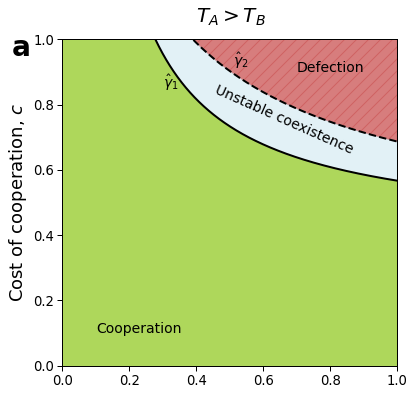

In [73]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ax.plot(v[v>vhat], γ2[v>vhat], '--k', lw=2)

## ii. c<γ1
ax.fill_between(v, γ1, color='yellowgreen', alpha=0.8)

## v. c > γ2
ax.fill_between(v, 1, γ2, color='indianred', hatch="//", alpha=0.8)

## viii. γ1 < c < γ2
ax.fill_between(v, γ1, γ2, color='lightblue', alpha=0.35)

ax.set(
    #xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)
ax.set_ylabel(ylabel='Cost of cooperation, $c$', fontsize=18)

ax.text(0.1, 0.1, r'Cooperation', fontdict=fontdict)
ax.text(0.7, 0.9, r'Defection', fontdict=fontdict)
ax.text(0.45, 0.65, r'Unstable coexistence', fontdict=fontdict, rotation = -24)
ax.text(0.3, 0.85, r'$\hat\gamma_1$', fontdict=fontdict)
ax.text(0.51, 0.92, r'$\hat\gamma_2$', fontdict=fontdict)
ax.text(-0.15, 0.95, 'a', fontdict=dict(fontsize=28, weight='bold'))
ax.text(0.4, 1.05, r'$T_A>T_B$', fontdict=dict(fontsize=20))

fig.savefig('Figures/Result3_TA_TB.pdf')
fig.savefig('Figures/Result3_TA_TB.eps')

## Alpha vs v graph

$T_A > T_B$

In [74]:
TA = 0.5
TB = 0.4
b = 1.2
c = 0.5

In [75]:
v = np.linspace(1e-10, 1-1e-10, 1000)

In [76]:
a1 = (c*v*(1-TA)-(TA-TB)*(1+b-c))/(b*v*TB)
a2 = (c*v*(1-TB)-(TA-TB))/(b*v*TA)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


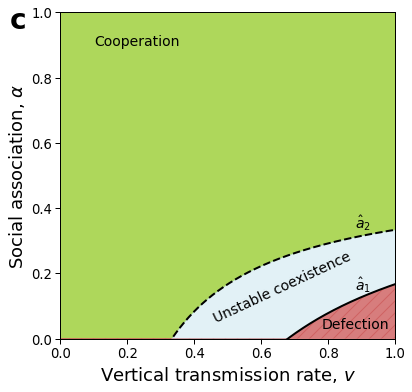

In [77]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, a1, '-k', lw=2)
ax.plot(v, a2, '--k', lw=2)
ax.set(ylim=(0, 1),
    xlim=(0, 1)
)
ax.set_xlabel('Vertical transmission rate, $v$', fontsize=18)
ax.set_ylabel(r'Social association, $\alpha$', fontsize=18)

##  α > a2
ax.fill_between(v, 1, a2, color='yellowgreen', alpha=0.8)

#  α < a1
ax.fill_between(v, a1, color='indianred', hatch="//", alpha=0.8) 

# a1 < α < a2
ax.fill_between(v, a1, a2, color='lightblue', alpha=0.35)

ax.text(0.1, 0.9, r'Cooperation', fontdict=fontdict)
ax.text(0.78, 0.03, r'Defection', fontdict=fontdict)
ax.text(0.45, 0.05, r'Unstable coexistence', fontdict=fontdict, rotation = 25)
ax.text(0.88, 0.15, r'$\hat{a}_1$', fontdict=fontdict)
ax.text(0.88, 0.34, r'$\hat{a}_2$', fontdict=fontdict)
ax.text(-0.15, 0.95, 'c', fontdict=dict(fontsize=28, weight='bold'))



fig.savefig('Figures/Result3_alpha_Vs_v_TA_TB.pdf')
fig.savefig('Figures/Result3_alpha_Vs_v_TA_TB.eps')

$T_B > T_A$

In [2]:
TA = 0.5
TB = 0.7
b = 2
c = 0.5

In [3]:
v = np.linspace(1e-10, 1-1e-10, 1000)

In [4]:
a1 = (c*v*(1-TA)-(TA-TB)*(1+b-c))/(b*v*TB)
a2 = (c*v*(1-TB)-(TA-TB))/(b*v*TA)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


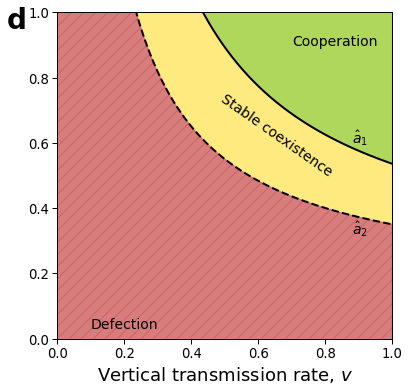

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, a1, '-k', lw=2)
ax.plot(v, a2, '--k', lw=2)
ax.set(#ylabel=r'Social association, $\alpha$',
    ylim=(0, 1),
    xlim=(0, 1)
)
ax.set_xlabel('Vertical transmission rate, $v$', fontsize=18)

##  α > a1 - fixation of cooperation
ax.fill_between(v, 1, a1, color='yellowgreen', alpha=0.8)

## a2 < α < a1 - stable coexisetence
ax.fill_between(v, a2, a1, color='gold', alpha=0.5)

## α < a2 - fixation of defection
ax.fill_between(v, a2, color='indianred', hatch="//", alpha=0.8) 


ax.text(0.7, 0.9, r'Cooperation', fontdict=fontdict)
ax.text(0.1, 0.03, r'Defection', fontdict=fontdict)
ax.text(0.48, 0.5, r'Stable coexistence', fontdict=fontdict, rotation = -35)
ax.text(0.88, 0.6, r'$\hat{a}_1$', fontdict=fontdict)
ax.text(0.88, 0.32, r'$\hat{a}_2$', fontdict=fontdict)
ax.text(-0.15, 0.95, 'd', fontdict=dict(fontsize=28, weight='bold'))


fig.savefig('Figures/Result3_alpha_Vs_v_TB_TA.pdf')
fig.savefig('Figures/Result3_alpha_Vs_v_TB_TA.eps')

# Reccurnce - Result 3

In [81]:
p = np.arange(0, 1, 0.0001)

def p_adult_function(p):
    p_adults = (p**2)*(T_B-T_A)+p*(1+T_A-T_B)
    return p_adults

def p_parents_function(p):
    x1 = (p ** 2)*(1+b-c)*(1-(1-p)*(1-α)*T_B)
    x2 = p*(1-p)*(1-c)*(p*(1-α)*T_B+1-T_B)
    x3 = p*(1-p)*(1+b)*(p*(1-α)+α)*T_A
    x4 = ((1-p)**2)*p*(1-α)*T_A
    omega = 1+p*(b-c)
    p_parents = (x1+x2+x3+x4)/omega
    return p_parents

def p_next_gen(p_adults, p_parents):
    p_tag = v*p_parents + (1-v)*p_adults
    return p_tag

5.97
2.696
p*0.4515912897822446
0.45159128978224455
----
-0.09403999999999998
-0.042920000000000014
p*0.4564015312632924
0.4564015312632924


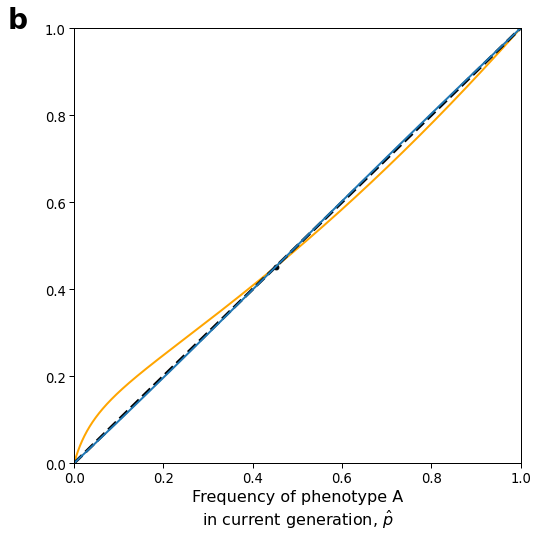

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))

b=20
α = 1
T_A = 0.4
T_B = 0.9
v = 0.4
c = 0.1

β1 = (c*(1-v)-b*(1-α*v))*(T_A-T_B)
β3 = α*b*v*T_A - c*v*(1-T_B) + T_A-T_B

print(β1)
print(β3)
print("p*" + str(β3/β1))



p_parents = p_parents_function(p)
p_adults = p_adult_function(p)

p_tag = p_next_gen(p_adults, p_parents)

p1 =  p_next_gen(p_adult_function(β3/β1), p_parents_function(β3/β1))
print(p1)

ax.plot(p, p_tag, color = "orange", linewidth = 2)
ax.plot(p, p, 'k--', linewidth = 3)
ax.plot(β3/β1, β3/β1, "ko", label = r'$\hat{p}^*$')
ax.set_xlabel(r'Frequency of phenotype A' + '\n' + r'in current generation, $\hat{p}$', fontdict=dict(fontsize=16))
#ax.set_ylabel(r"Frequency of phenotype A in next generation, $\hat{p}'$", fontdict=dict(fontsize=13))
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)


print("----")

b=1.2
α = 0.09
T_A = 0.5
T_B = 0.4
v = 0.6
c = 0.487

β1 = (c*(1-v)-b*(1-α*v))*(T_A-T_B)
β3 = α*b*v*T_A - c*v*(1-T_B) + T_A-T_B

print(β1)
print(β3)
print("p*" + str(β3/β1))

p_parents = p_parents_function(p)
p_adults = p_adult_function(p)

p_tag = p_next_gen(p_adults, p_parents)

p1 =  p_next_gen(p_adult_function(β3/β1), p_parents_function(β3/β1))
print(p1)
ax.plot(p, p_tag, linewidth = 2)
ax.text(-0.15, 1, 'b', fontdict=dict(fontsize=28, weight='bold'))


plt.savefig('Figures\coexistence_with_oblique.pdf')

# Time graphs

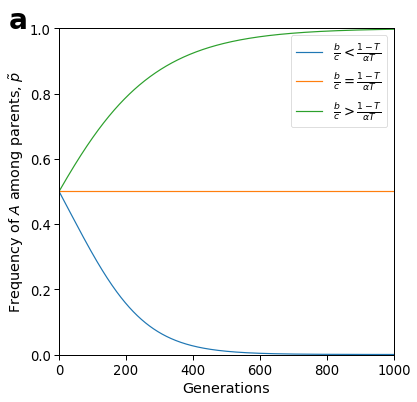

In [108]:
### T_A = T_B = T
### alpha <> 0

def evolution0(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old ** 2)*(1+b-c)*(1-(1-p_old)*(1-alpha)*T_B)
        x2 = p_old*(1-p_old)*(1-c)*(p_old*(1-alpha)*T_B+1-T_B)
        x3 = p_old*(1-p_old)*(1+b)*(p_old*(1-alpha)+alpha)*T_A
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        omega = 1+p_old*(b-c)
        result = (x1+x2+x3+x4)/omega
        p.append(result)
        if result > 1:
            break

    return p

p0 = 0.5
c = 0.1
T_A =0.2
T_B = 0.2
alpha = 0.5
generations = 1000
fig, ax = plt.subplots(figsize=(6, 6))


b = 0.7
ax.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} < \frac{1-T}{\alpha T}$')
b = 0.8
ax.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} = \frac{1-T}{\alpha T}$')
b = 0.9
ax.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} > \frac{1-T}{\alpha T}$')
ax.legend()
ax.set_xlabel('Generations')
ax.set_ylabel(r'Frequency of $A$ among parents, $\tilde{p}$')
ax.set_ylim(0, 1)
ax.set_xlim(0, generations)
ax.text(-150, 1, 'a', fontdict=dict(fontsize=28, weight='bold'))
plt.savefig('Figures/Time_Figure_Equal_Horizontal.pdf')

0.35576923076923084


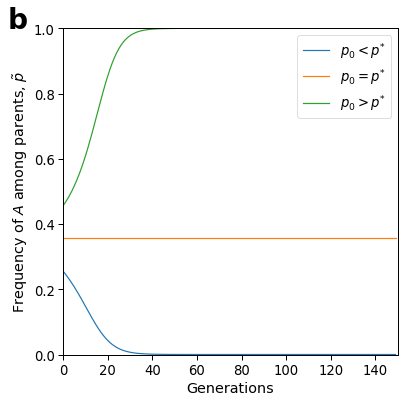

In [113]:
### Only vertical, alpha = 0

b = 1.3
c = 0.65
T_A = 0.5
T_B = 0.1
alpha = 0
generations = 150
fig, ax = plt.subplots(figsize=(6, 6))

p_star = c*(1-T_B)/(b*(T_A-T_B))-1/b
print(p_star)
ax.plot(evolution0(p_star-0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 < p^{*}$')
ax.plot(evolution0(p_star, b, c, T_A, T_B, alpha, generations), label=r'$p_0 = p^{*}$')
ax.plot(evolution0(p_star+0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 > p^{*}$')
ax.legend()
ax.set_xlabel('Generations')
ax.set_ylabel(r'Frequency of $A$ among parents, $\tilde{p}$')
ax.set_ylim(0, 1)
ax.set_xlim(0, generations)
ax.text(-25, 1, 'b', fontdict=dict(fontsize=28, weight='bold'))
plt.savefig('Figures/Time_Figure_Only_Vertical_No_Alpha.pdf')

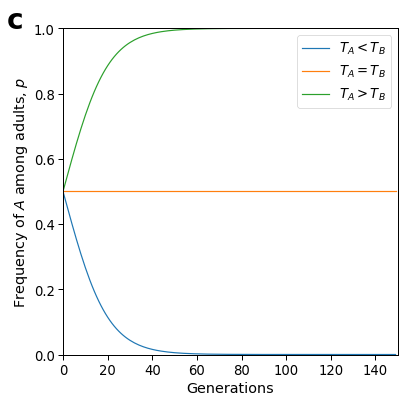

In [114]:
#### v = 0

def evolution2(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old**2)*(alpha+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x2 = p_old*(1-p_old)*(alpha*(1-T_B)+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x3 = p_old*(1-p_old)*(alpha*T_A+(1-alpha)*p_old*T_A)
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        result = (x1+x2+x3+x4)
        p.append(result)
        if result > 1:
            break

    return p

p0 = 0.5
b = 1.3
c = 0.5
T_A = 0.5
alpha = 0.5
generations = 150
fig, ax = plt.subplots(figsize=(6, 6))


T_B = T_A + 0.1 # 0.6
ax.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A < T_B$')

T_B = T_A # 0.5
ax.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A = T_B$')

T_B = T_A - 0.1 # 0.4
ax.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A > T_B$')


ax.legend()
ax.set_xlabel('Generations')
ax.set_ylabel('Frequency of $A$ among adults, $p$')
ax.set_ylim(0, 1)
ax.set_xlim(0, generations)
ax.text(-25, 1, 'c', fontdict=dict(fontsize=28, weight='bold'))
plt.savefig('Figures/Time_Figure_No_Vertical.pdf')

# invasion

In [74]:
def Get_P1_Next_Gen(p1, p2, p3, p4, b, c, TA, TB, α):
    w = 1 + (b-c)*(p1+p3)
    p1_tag = p1*(p1+p3)*(1+b-c)*(1-(1-α)*(p2+p4)*TB) 
    p1_tag += p1*(p2+p4)*(1-c)*(1-α*TB*(p1+p3)-TB*(p2+p4)) 
    p1_tag += p2*(p1+p3)*(1+b)*TA*(p1+p3+α*(p2+p4))  
    p1_tag += p2*(p2+p4)*(p1+p3)*(1-α)*TA

    return p1_tag/w

def Get_P3_Next_Gen(p1, p2, p3, p4, b, c, TA, TB, α): 
    w = 1 + (b-c)*(p1+p3)
    p3_tag = p3*(p1+p3)*(1+b-c)*(1-(1-α)*(p2+p4)*TB) 
    p3_tag += p3*(p2+p4)*(1-c)*(1-α*TB*(p1+p3)-TB*(p2+p4)) 
    p3_tag += p4*(p1+p3)*(1+b)*TA*(p1+p3+α*(p2+p4))  
    p3_tag += p4*(p2+p4)*(p1+p3)*(1-α)*TA

    return p3_tag/w

def Get_P2_Next_Gen(p1, p2, p3, p4, b, c, TA, TB, α): 
    w = 1 + (b-c)*(p1+p3)
    p2_tag = p2*(p2+p4)*(1-(1-α)*(p1+p3)*TA)
    p2_tag += p2*(p1+p3)*(1+b)*(1-α*TA*(p2+p4)-TA*(p1+p3))
    p2_tag += p1*(p2+p4)*(1-c)*(α*TB+(1-α)*(p2+p4)*TB)
    p2_tag += p1*(p1+p3)*(1+b-c)*(1-α)*(p2+p4)*TB

    return p2_tag/w

def Get_P4_Next_Gen(p1, p2, p3, p4, b, c, TA, TB, α): 
    w = 1 + (b-c)*(p1+p3)
    p4_tag = p4*(p2+p4)*(1-(1-α)*(p1+p3)*TA)
    p4_tag += p4*(p1+p3)*(1+b)*(1-α*TA*(p2+p4)-TA*(p1+p3))
    p4_tag += p3*(p2+p4)*(1-c)*(α*TB+(1-α)*(p2+p4)*TB)
    p4_tag += p3*(p1+p3)*(1+b-c)*(1-α)*(p2+p4)*TB

    return p4_tag/w



In [89]:
c = 0.05
TA = 0.4
TB = 0.7
b = 1.3
α1 = 0.7
p_equilibrium = (c*(1-TB) - b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))
print('p* = ' + str(p_equilibrium))

p_0 = 0.05
α2 = 0.71

x = p_0
invaitor = [x]
p1 = p_equilibrium 
p2 = 1 - p_equilibrium - p_0
p3 = 0
p4 = p_0
while (x < 1-p_0):
    p1_tag = Get_P1_Next_Gen(p1 = p1  , p2 = p2, p3 = p3, p4 = p4, b = b, c = c, TA = TA, TB = TB, α = α1)
    p2_tag = Get_P2_Next_Gen(p1 = p1  , p2 = p2, p3 = p3, p4 = p4, b = b, c = c, TA = TA, TB = TB, α = α1)
    p3_tag = Get_P3_Next_Gen(p1 = p1  , p2 = p2, p3 = p3, p4 = p4, b = b, c = c, TA = TA, TB = TB, α = α2)
    p4_tag = Get_P4_Next_Gen(p1 = p1  , p2 = p2, p3 = p3, p4 = p4, b = b, c = c, TA = TA, TB = TB, α = α2)
    x = p3_tag + p4_tag
    if (x < p3 + p4):
        print('new value ' + str(x) + ' is less than previous value ' + str(p3+p4))
        break
    invaitor.append(x)
    print(x)
    p1 = p1_tag
    p2 = p2_tag
    p3 = p3_tag
    p4 = p4_tag




p* = 0.4188034188034192
0.05068723702664798
0.05100851111411278
0.051157777425397
0.05122619649664963
0.051256614682810425
0.051269170647532
0.05127333026863743
0.05127354299489133
new value 0.051271900371216254 is less than previous value 0.05127354299489133
